# Project: Investigate a Dataset (Football Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   >This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive
   >I investigate the Soccer dataset. Mainly, the dataset have 7 tables called 'Country', 'League', 'Match', 'Player',
    'Player Attributes', 'Team' and 'Team Attributes'.
    the dataset contains useful data about 11 seasons between 2008 and 2016 in different leagues and a list of (players, teams) attributes Players and Teams' attributes* sourced from EA Sports' FIFA video game series. Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches 16th Oct 2016: New table containing teams' attributes from FIFA ! Each record has its table connected with the other by identification numbers. the player's table describes players' names and their weight and height. player attributes describe their abilities and rating their potentials. 
    
###  During the analysis of the dataset I wanna focus answer these questions:
     
<ul>
<li>How many matches are there in each league in the 2016 season?</li>
<li>Which League had the most matches end as draw in the 2016 season?</li>
<li>Which League had the most Wins or not Draw in the 2016 season?</li>
<li>Which team had lost the fewest matches in the 2016 season?</li>
<li>Which League had the most goals in the 2016 season?</li>
<li>Which teams had the most wins of matches in the 2016 season?</li>   
<li>What teams improved the most over the time period? </li>
<li>Which players had the most penalties?</li>
<li>What team attributes lead to the most victories?</li>
<li>How many Players have overall rating more than 90?</li>
<li>What are the attributes that contribute to the players' overall rating?</li>
</ul>

In [122]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

## Now we will gather and collect data from CSV files  

In [123]:
#load the data to analyze it
df_match = pd.read_csv('../input/european-soccer-database/Match.csv')
df_player_attribute = pd.read_csv('../input/european-soccer-database/Player_Attributes.csv')
df_team_attribute = pd.read_csv('../input/european-soccer-database/Team_Attributes.csv')
df_team = pd.read_csv('../input/european-soccer-database/Team.csv')
df_player = pd.read_csv('../input/european-soccer-database/Player.csv')
df_country = pd.read_csv('../input/european-soccer-database/Country.csv')
df_league = pd.read_csv('../input/european-soccer-database/League.csv')

In [124]:
#Sample of Match Table
df_match.head() 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [125]:
#Columns in the match table
df_match.columns 

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [126]:
# Number of Rows, Columns
df_match.shape 

(25979, 115)

In [127]:
# information about Match table 
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [128]:
# Number of Duplicated Records in Match table
df_match.duplicated().sum()

0

In [129]:
# Number of NULL values in Match table
df_match.isnull().sum().sum()

407395

In [130]:
#descriptive stats
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


#### Match Table:-
    Contain 25979 Records & 115 Columns.
    No duplicate records 
    Has a lot of missing values (407395) but all null values in columns I won't need in processes, So I'll drop it. 

In [131]:
#Sample of Country Table
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [132]:
# Number of Rows, Columns
df_country.shape

(11, 2)

In [133]:
# information about country table 
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [134]:
df_country.describe()

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


#### Country Table:-
    Contain 11 Records & 2 Columns.
    No duplicate records 
    No missing values. 

In [135]:
#Sample of team Table
df_team.head() 

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [136]:
# Number of Rows, Columns
df_team.shape

(299, 5)

In [137]:
# information about team table 
df_team.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [138]:
# Number of Duplicated Records team table
df_team.duplicated().sum()

0

In [139]:
# Number of NULL values in each table in team table
df_team.isnull().sum().sum()

11

In [140]:
df_team.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


#### Team Table:-
    Contain 299 Records & 5 Columns.
    No duplicate records 
    Has missing values(11) but all null values in team_fifa_api_id column.

In [141]:
#Sample of team attribute Table
df_team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [142]:
# Number of Rows, Columns
df_team_attribute.shape

(1458, 25)

In [143]:
# information about team attribute table 
df_team_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [144]:
# Number of Duplicated Records team attribute table
df_team_attribute.duplicated().sum()

0

In [145]:
# Number of NULL values in each table in team attribute table
df_team_attribute.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [146]:
# Number of NULL values in team attribute table 
df_team_attribute.isna().sum().sum()

969

In [147]:
df_team_attribute.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


#### Team Table:-
    Contain 1458 Records & 25 Columns.
    No duplicate records 
    Has a lot of missing values(969) but all null values in buildUpPlayDribbling colums, So I'll drop it.

In [148]:
#Sample of league Table
df_league 

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [149]:
# Number of Rows, Columns
df_league.shape

(11, 3)

In [150]:
df_league.isnull().sum().sum()

0

In [151]:
# information about league table 
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [152]:
df_league.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


#### League Table:-
    Contain 11 Records & 3 Columns.
    No duplicate records 
    No missing values. 

In [153]:
#Sample of player Table
df_player.head() 

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [154]:
# Number of Rows, Columns
df_player.shape

(11060, 7)

In [155]:
# Number of duplicate values
df_player.duplicated().sum()

0

In [156]:
# Number of NULL values in team table
df_player.isna().sum().sum()

0

In [157]:
df_player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


#### Player Table:-
    Contain 11060 Records & 7 Columns.
    No duplicate records 
    Has no missing values.

In [158]:
#Sample of player attribute Table
df_player_attribute.head()  

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [159]:
# Number of Rows, Columns
df_player_attribute.shape

(183978, 42)

In [160]:
# information about player attribute table 
df_player_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [161]:
# Number of Duplicated Records player attribute table
df_player_attribute.duplicated().sum()

0

In [162]:
# Number of NULL values in each columns in _player attribute table
df_player_attribute.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [163]:
# Number of NULL values in player attribute table
df_player_attribute.isna().sum().sum()

47301

In [164]:
df_player_attribute.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


#### Player Attributes Table:-
    Contain 183973 Records & 42 Columns.
    No duplicate records 
    Has a lot of missing values(47301).
    

# What I found:

+25,000 matches

+10,000 players

11 Countries with their lead championship

Seasons 2008 to 2016



| Table        |Records   | Columns |
| -------------|:-------------:| ------------:|
| League       |11             |3             |
| Match        |25979          |115           |
| Player       |11060         |7            |
| Player_Attributes|183978     |42            |
| Team        |299             |5             |
|Team_Attributes|1458          |25            |

## After getting idea of Dataset We go through Cleaning  the data and handle missing values

### Data Cleaning  (Matches Table)

In [165]:
# Select columns which we need in analysis
df_match=df_match.loc[:,:'away_team_goal'] 
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [166]:
#Convert Date to DateTime type to gain availability to dedicate a year of each date
df_match['date'] = pd.to_datetime(df_match['date'])

In [167]:
# Add new Columns to match table store years
df_match['season_year'] = df_match['date'].dt.year
#Print The maximum and minimum year in season year column
str(df_match['season_year'].min()) + " : " + str(df_match['season_year'].max())

'2008 : 2016'

In [168]:
# rename column: name to country_name 
df_country.rename(columns={'name' : 'country_name', }, inplace=True)

# join df_match with country table by inner join type .
df_match = df_match.merge(df_country, how='inner', left_on= "country_id", right_on = "id")

# drop column id_y
df_match.drop(columns=['id_y'], inplace=True)
# rename column: id_x to id 
df_match.rename(columns={'id_x' : 'id'}, inplace=True)
#Show sample
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,Belgium
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,Belgium
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,Belgium


join df_match with team table by inner join type for home team

In [169]:
df_match = df_match.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')
# rename column: team_long_name to home_team_name 
df_match.rename(columns={'team_long_name': 'home_team_name','country_name_x'  : 'country_name' , 'id_x' : 'id'}, inplace=True)

# drop column home_team_api_id and team_api_id
df_match.drop(columns=['home_team_api_id', 'team_api_id', 'id_y'], axis=1, inplace=True)
#Show sample
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name,team_fifa_api_id,home_team_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,2008,Belgium,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15,492583,9999,1,1,2008,Belgium,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29,492651,9984,3,2,2008,Belgium,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13,492713,9986,1,0,2008,Belgium,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24,492805,9998,2,0,2009,Belgium,673.0,KRC Genk,GEN


join df_match with team table by left join type for away team

In [170]:
df_match = df_match.merge(df_team, how='left', left_on='away_team_api_id', right_on='team_api_id')
# rename column: team_long_name to away_team_name , id_x to id 
df_match.rename(columns={'team_long_name': 'away_team_name', 'id_x' : 'id'}, inplace=True)
# drop unnecessary columns
df_match.drop(columns=['team_api_id', 'away_team_api_id','team_fifa_api_id_x', 'team_fifa_api_id_y','team_fifa_api_id_y','team_short_name_y','id_y'], axis=1, inplace=True)

#Show sample
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 25979 non-null  int64         
 1   country_id         25979 non-null  int64         
 2   league_id          25979 non-null  int64         
 3   season             25979 non-null  object        
 4   stage              25979 non-null  int64         
 5   date               25979 non-null  datetime64[ns]
 6   match_api_id       25979 non-null  int64         
 7   home_team_goal     25979 non-null  int64         
 8   away_team_goal     25979 non-null  int64         
 9   season_year        25979 non-null  int64         
 10  country_name       25979 non-null  object        
 11  home_team_name     25979 non-null  object        
 12  team_short_name_x  25979 non-null  object        
 13  away_team_name     25979 non-null  object        
dtypes: dat

join df_match with league table by inner join type for away team

In [171]:
# rename the two columns 'name' and 'id'
df_league.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

# join df_match with league table by inner join type for away team
df_match = df_match.merge(df_league, how='inner', on='league_id')

# drop now country_id and league_id
df_match.drop(columns=["league_id","country_id_y" , "country_id_x"], inplace=True)

#Show sample
df_match.describe()

,id,stage,match_api_id,home_team_goal,away_team_goal,season_year
count,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000
mean,12990.000000,18.242773,1.195429e+06,1.544594,1.160938,2011.998653
std,7499.635658,10.407354,4.946279e+05,1.297158,1.142110,2.354741
min,1.000000,1.000000,4.831290e+05,0.000000,0.000000,2008.000000
25%,6495.500000,9.000000,7.684365e+05,1.000000,0.000000,2010.000000
50%,12990.000000,18.000000,1.147511e+06,1.000000,1.000000,2012.000000
75%,19484.500000,27.000000,1.709852e+06,2.000000,2.000000,2014.000000
max,25979.000000,38.000000,2.216672e+06,10.000000,9.000000,2016.000000


In [172]:
#Check Missed valuse befor start analysis
df_match.isna().sum().sum()

0

### Data Cleaning  (Players)

 join df_player with df_player_attribute table by inner join type to easy found pkayer name with attributes

In [173]:
df_player = df_player.merge(df_player_attribute, on=['player_api_id','player_fifa_api_id'], how = "inner")
# rename column: id_x to id 
df_player.rename(columns={'id_x' : 'id'}, inplace=True)
# drop column id_y,player_api_id, player_fifa_api_id
df_player.drop(columns=["id_y","player_api_id" , "player_fifa_api_id"], inplace=True)
#Show sample
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183766 non-null  int64  
 1   player_name          183766 non-null  object 
 2   birthday             183766 non-null  object 
 3   height               183766 non-null  float64
 4   weight               183766 non-null  int64  
 5   date                 183766 non-null  object 
 6   overall_rating       183016 non-null  float64
 7   potential            183016 non-null  float64
 8   preferred_foot       183016 non-null  object 
 9   attacking_work_rate  180622 non-null  object 
 10  defensive_work_rate  183016 non-null  object 
 11  crossing             183016 non-null  float64
 12  finishing            183016 non-null  float64
 13  heading_accuracy     183016 non-null  float64
 14  short_passing        183016 non-null  float64
 15  volleys          

In [174]:
## Drop duplicated records
df_player.drop_duplicates(inplace = True)
## Drop records have missed value
df_player.dropna(inplace=True)

In [175]:
#Check Missed valuse befor start analysis
df_player.isna().sum().sum()

0

### Data Cleaning  (Teams Table)

We Drop a buildUpPlayDribbling collum which has most missed values in team table

In [176]:
#Drop a collum which has most missed values
df_team_attribute.drop(columns=['buildUpPlayDribbling'], axis=1, inplace=True)

join df_team with df_team_attribute table by inner join type to easy merge name of name beside Their attributes

In [177]:
df_team = df_team.merge(df_team_attribute , on = ['team_api_id','team_fifa_api_id'], how = 'inner')
# drop column id_y,team_api_id, team_fifa_api_id, team_short_name
df_team.drop(columns=["id_y","team_api_id" , "team_fifa_api_id","team_short_name"], inplace=True)
# rename column: id_x to id 
df_team.rename(columns={'id_x': 'id'}, inplace=True)

#Show some information
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180228 entries, 0 to 183765
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180228 non-null  int64  
 1   player_name          180228 non-null  object 
 2   birthday             180228 non-null  object 
 3   height               180228 non-null  float64
 4   weight               180228 non-null  int64  
 5   date                 180228 non-null  object 
 6   overall_rating       180228 non-null  float64
 7   potential            180228 non-null  float64
 8   preferred_foot       180228 non-null  object 
 9   attacking_work_rate  180228 non-null  object 
 10  defensive_work_rate  180228 non-null  object 
 11  crossing             180228 non-null  float64
 12  finishing            180228 non-null  float64
 13  heading_accuracy     180228 non-null  float64
 14  short_passing        180228 non-null  float64
 15  volleys          

Add new Columns to team table store years

In [178]:
#convert date to datatime type to get year easily
df_team['date'] = pd.to_datetime(df_team['date']) 
df_team['year'] = df_team['date'].dt.year

In [179]:
## Drop records have missed value
df_team.dropna(inplace=True)
## Drop duplicated records
df_team.drop_duplicates(inplace = True)
df_team.describe()

,id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,22708.422787,52.463967,48.489362,52.166781,53.734386,53.971860,46.017845,49.253946,52.187371,2012.505148
std,15008.544877,11.549653,10.899771,10.364195,11.090171,10.330588,10.230702,9.740734,9.577828,1.708538
min,1.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,2010.000000
25%,9548.000000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,2011.000000
50%,20525.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000
75%,35294.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,2014.000000
max,50204.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000


In [180]:
#Check Missed valuse befor start analysis
df_team.isna().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### How many matches are there in the 2016 season?

Now we will Discover How many matches are there in the 2016 season? To know Most result come from leagues have more matches for Winner or Goals That's make sense

In [181]:
# Create a new fuction which return name of winner team from every match
def win(df_match):
    """
    Input: DataFrame contain 4 Columns home_team_goal, away_team_goal, home_team_name, away_team_name
    OutPut: New Column for winner teams
    """
    home_score = df_match[0] #home_team_goal
    away_score = df_match[1] #away_team_goal
    home_team_name = df_match[2] #home_team_name
    away_team_name = df_match[3] #away_team_name
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'DRAW'
    
# Add new column which store winners team within Win Function   
df_match['winner']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(win, axis=1)

In [184]:
# Filter matches that only played in the 2015/2016 season
match_2016 = df_match[df_match['season'] == '2015/2016'] 
match_2016

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,season_year,country_name,home_team_name,team_short_name_x,away_team_name,league_name,winner
91,1491,2015/2016,1,2015-07-25,1979834,3,1,2015,Belgium,KRC Genk,GEN,Oud-Heverlee Leuven,Belgium Jupiler League,KRC Genk
92,1499,2015/2016,10,2015-10-04,1979898,3,1,2015,Belgium,KRC Genk,GEN,Standard de Liège,Belgium Jupiler League,KRC Genk
93,1515,2015/2016,12,2015-10-23,1979914,0,4,2015,Belgium,KRC Genk,GEN,Royal Excel Mouscron,Belgium Jupiler League,Royal Excel Mouscron
94,1530,2015/2016,14,2015-10-30,1979929,0,2,2015,Belgium,KRC Genk,GEN,Sporting Lokeren,Belgium Jupiler League,Sporting Lokeren
95,1554,2015/2016,17,2015-11-28,1979953,0,1,2015,Belgium,KRC Genk,GEN,KAA Gent,Belgium Jupiler League,KAA Gent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25936,2015/2016,34,2016-05-16,1992217,1,3,2016,Switzerland,Lugano,LUG,BSC Young Boys,Switzerland Super League,BSC Young Boys
25975,25946,2015/2016,36,2016-05-25,1992226,3,0,2016,Switzerland,Lugano,LUG,FC St. Gallen,Switzerland Super League,Lugano
25976,25960,2015/2016,6,2015-08-22,1992076,1,3,2015,Switzerland,Lugano,LUG,FC Basel,Switzerland Super League,FC Basel
25977,25965,2015/2016,7,2015-08-29,1992081,0,1,2015,Switzerland,Lugano,LUG,FC Luzern,Switzerland Super League,FC Luzern


In [186]:
# Count every match Played in each league in the 2015/2016 season 
match_Played = match_2016.groupby('league_name')['home_team_name'].count().sort_values(ascending=False)
match_Played

league_name
England Premier League      380
France Ligue 1              380
Italy Serie A               380
Spain LIGA BBVA             380
Germany 1. Bundesliga       306
Netherlands Eredivisie      306
Portugal Liga ZON Sagres    306
Belgium Jupiler League      240
Poland Ekstraklasa          240
Scotland Premier League     228
Switzerland Super League    180
Name: home_team_name, dtype: int64

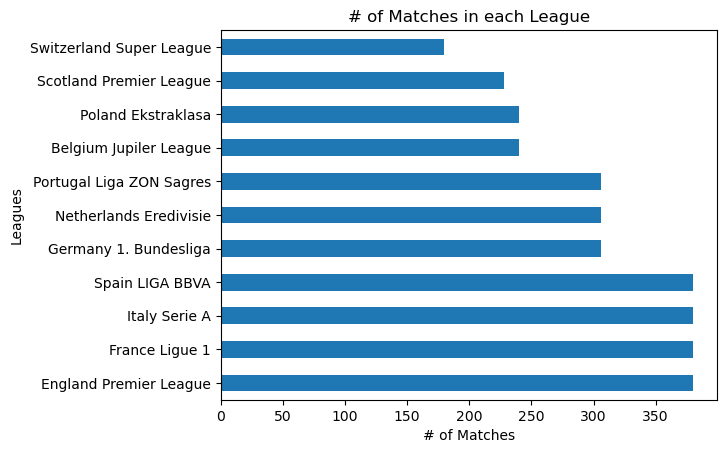

In [187]:
# Figure the result
match_Played.plot(kind='barh', title='# of Matches in each League');
plt.xlabel('# of Matches');
plt.ylabel('Leagues');

### Which League had the most matches end as draw in the 2016 season?

In this question, we will take an impression of the most defensive league

In [188]:
match_2016[['winner',"league_name"]].value_counts().loc["DRAW"]

league_name
France Ligue 1              108
England Premier League      107
Italy Serie A                95
Spain LIGA BBVA              92
Portugal Liga ZON Sagres     76
Poland Ekstraklasa           74
Netherlands Eredivisie       74
Germany 1. Bundesliga        71
Belgium Jupiler League       59
Scotland Premier League      52
Switzerland Super League     47
dtype: int64

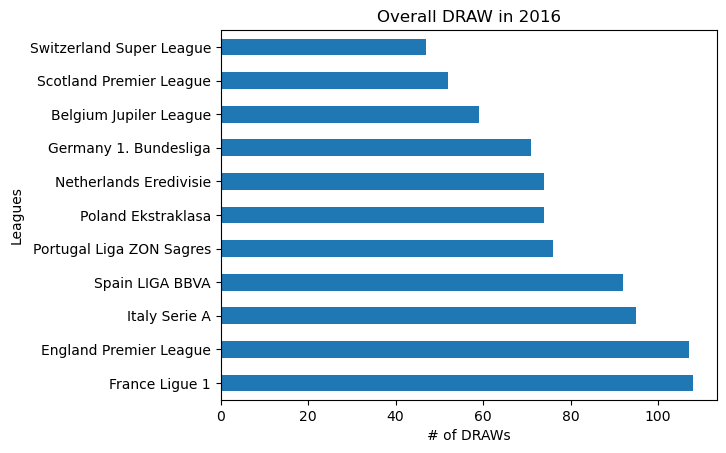

In [189]:
# Figure the result
match_2016[['winner',"league_name"]].value_counts().loc["DRAW"].plot(kind='barh', title='Overall DRAW in 2016');
plt.xlabel('# of DRAWs');
plt.ylabel('Leagues');

In [190]:
match_2016[['winner',"league_name"]].value_counts().loc["DRAW"]

league_name
France Ligue 1              108
England Premier League      107
Italy Serie A                95
Spain LIGA BBVA              92
Portugal Liga ZON Sagres     76
Poland Ekstraklasa           74
Netherlands Eredivisie       74
Germany 1. Bundesliga        71
Belgium Jupiler League       59
Scotland Premier League      52
Switzerland Super League     47
dtype: int64

### Which team had the most Wins or not Draw in the 2016 season?

In this question, you get an impression of the most offensive league

In [191]:
wins16 = match_2016.groupby(["league_name"]).apply(lambda x: (x["winner"]!= 'DRAW').sum()).reset_index(name='winner').sort_values('winner')
wins16

,league_name,winner
10,Switzerland Super League,133
6,Poland Ekstraklasa,166
8,Scotland Premier League,176
0,Belgium Jupiler League,181
7,Portugal Liga ZON Sagres,230
5,Netherlands Eredivisie,232
3,Germany 1. Bundesliga,235
2,France Ligue 1,272
1,England Premier League,273
4,Italy Serie A,285


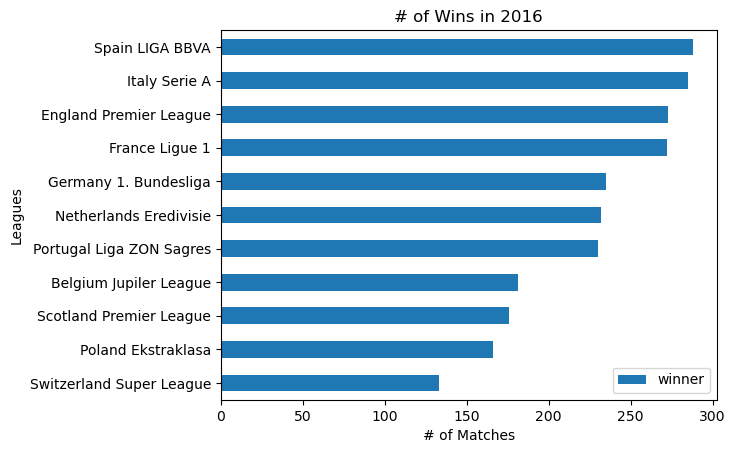

In [192]:
# Figure the result
wins16.plot(x= 'league_name' ,kind='barh', title='# of Wins in 2016');
plt.xlabel('# of Matches');
plt.ylabel('Leagues');

### How many goals in each League are there in the 2016 season?¶

In this question, you get an impression of the league's most attacking tendency

In [193]:
goals_2016 = match_2016.groupby('league_name')['home_team_goal'].sum().sort_values(ascending = False) + match_2016.groupby('league_name')['away_team_goal'].sum().sort_values(ascending = False)
goals_2016.sort_values(ascending = True, inplace =True)
goals_2016

league_name
Switzerland Super League     566
Poland Ekstraklasa           635
Scotland Premier League      650
Belgium Jupiler League       694
Portugal Liga ZON Sagres     831
Germany 1. Bundesliga        866
Netherlands Eredivisie       912
France Ligue 1               960
Italy Serie A                979
England Premier League      1026
Spain LIGA BBVA             1043
dtype: int64

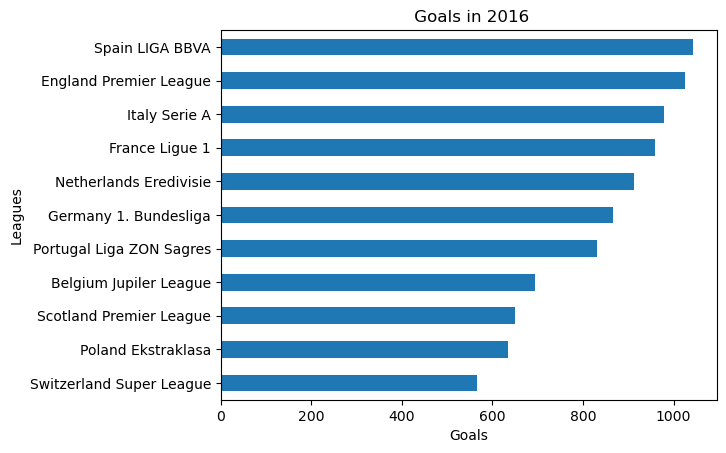

In [194]:
# Figure the result
goals_2016.plot(kind='barh', title=' Goals in 2016');
plt.xlabel('Goals');
plt.ylabel('Leagues');

### Which team had lost the fewest matches in the 2016 season?

This question gives us an impression that these teams has a great defense and Goalkeeper

In [196]:
# Add New Column for loser teams within lose function
def lose(df_match):
    '''
    Input: DataFrame contain 4 Columns home_team_goal, away_team_goal, home_team_name, away_team_name
    OutPut: New Column f9r loser teams
    '''
    home_score = df_match[0] #home_team_goal
    away_score = df_match[1] #away_team_goal
    home_team_name = df_match[2] #home_team_name
    away_team_name = df_match[3] #away_team_name
    
    if home_score < away_score:
        return home_team_name
    elif home_score > away_score:
        return away_team_name
    else:
        return 'DRAW'
    
df_match['loser']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(lose, axis=1)

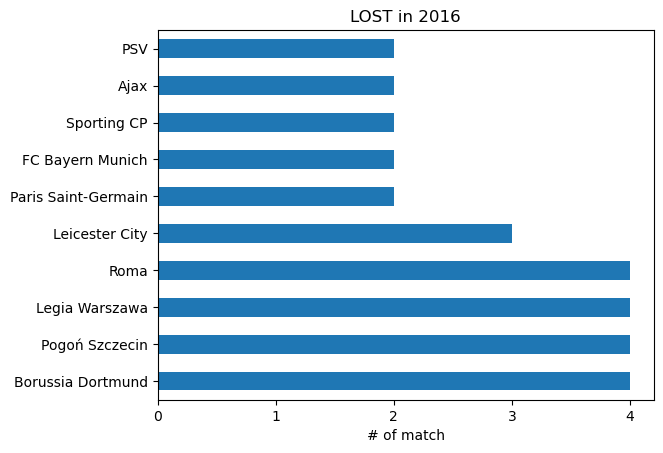

In [201]:
# Figure the result
match_2016 = df_match[df_match['season'] == '2015/2016'] 

match_2016.loser.value_counts().tail(10).plot(kind='barh', title='LOST in 2016',xticks = [0,1,2,3,4])
plt.xlabel('# of match');

### Which teams had the most wins of matches in the 2016 season?

Now we will discover top teams had the most win maybe it's give us that this team did a wonderful season and gives us an impression that these teams has dangerous attack

In [202]:
wins_16 = match_2016.winner.value_counts().head(10).iloc[1:]
wins_16

Paris Saint-Germain    30
Juventus               29
SL Benfica             29
FC Barcelona           29
Real Madrid CF         28
Atlético Madrid        28
FC Bayern Munich       28
Sporting CP            27
Celtic                 26
Name: winner, dtype: int64

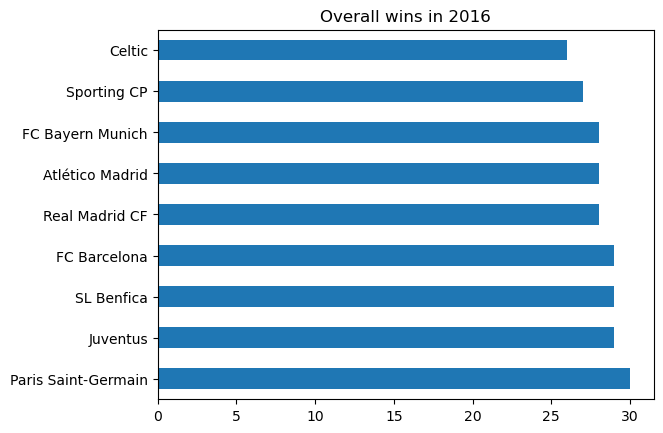

In [203]:
# Figure the result
wins_16.plot(kind='barh', title='Overall wins in 2016');

### What teams improved the most over the time period?

Now in this question, I'll choose 2 diffrent years to cover a long period. So I have chosen 2010, and 2016 to compare the details of the teams. In order words, using these years we analyze what teams improved the most.

Now we select the number of wins in 2010 and 2016 and take the difference then return process to calculate loses match for every team in 2010 and 2016

In [204]:
# Select wins games in 2010 
W2010 = df_match[(df_match['season_year'] == 2010) & (df_match['winner'] != 'DRAW')]
# Select lose games in 2010                                                     
L2010 = df_match[(df_match['season_year'] == 2010) & (df_match['loser'] != 'DRAW')]
# count wins games in 2010 
countW2010 = W2010['winner'].count()
# count lose games in 2010 
countL2010 = L2010['loser'].count()                                                    
# Sustract between winner and loser in 2010
R2010 = W2010['winner'].value_counts()/countW2010 - L2010['loser'].value_counts()/countL2010

# Select wins games in 2010 
W2016 = df_match[(df_match['season_year'] == 2016) & (df_match['winner'] != 'DRAW')]
# Select lose games in 2010                                                     
L2016 = df_match[(df_match['season_year'] == 2016) & (df_match['loser'] != 'DRAW')]
# count wins games in 2010 
countW2016 = W2016['winner'].count()
# count lose games in 2010 
countL2016 = L2016['loser'].count()                                                    
# Sustract between winner and loser in 2010
R2016 = W2016['winner'].value_counts()/countW2010 - L2016['loser'].value_counts()/countL2016

Then we take the average of total number of goals scored for each team in 2010 and 2016 and subtract them

In [205]:
# Select wins match in 2010 
match_2010 = df_match[df_match['season_year'] == 2010]
# Select wins match in 2016 
match_2016 = df_match[df_match['season_year'] == 2016]
#select average of away team goal in 2010
df_match_2010_away = match_2010.groupby(['away_team_name'])['away_team_goal'].mean()
#select average of home team goal in 2010
df_match_2010_home = match_2010.groupby(['home_team_name'])['home_team_goal'].mean()
#select average of away team goal in 2016
df_match_2016_away = match_2016.groupby(['away_team_name'])['away_team_goal'].mean()
#select average of home team goal in 2010
df_match_2016_home = match_2016.groupby(['home_team_name'])['home_team_goal'].mean()
#select average of all team goal in 2010
df_match_total_2010 = (df_match_2010_away + df_match_2010_home) / 2
#select average of all team goal in 2016
df_match_total_2016 = (df_match_2016_away + df_match_2016_home) / 2

select rate of change subtract average of all team goal in 2016 and 2010 then add result to subtract wins and loses

In [214]:
diff_match_2016_2010 = ((df_match_total_2016 - df_match_total_2010) + ( R2016 - R2010)) /2

now we create a function to store color of improved team and not improved

In [215]:
#set color list with green color for positive values and red color for negative values
color = []
def coloring(df):
        '''
        input: DataFrame about rate of change match_2016_2010
        Output: New column store color of all teams
        '''
        if df < 0:
            return 'red' #red color for negative values
        else:
            return 'green'  #green color for positive values
#call function coloring and store the result in color list
color= diff_match_2016_2010.sort_values().apply(coloring) 

Now will figure out using a color which red color for negative values and green color for positive values

Improved teams :72


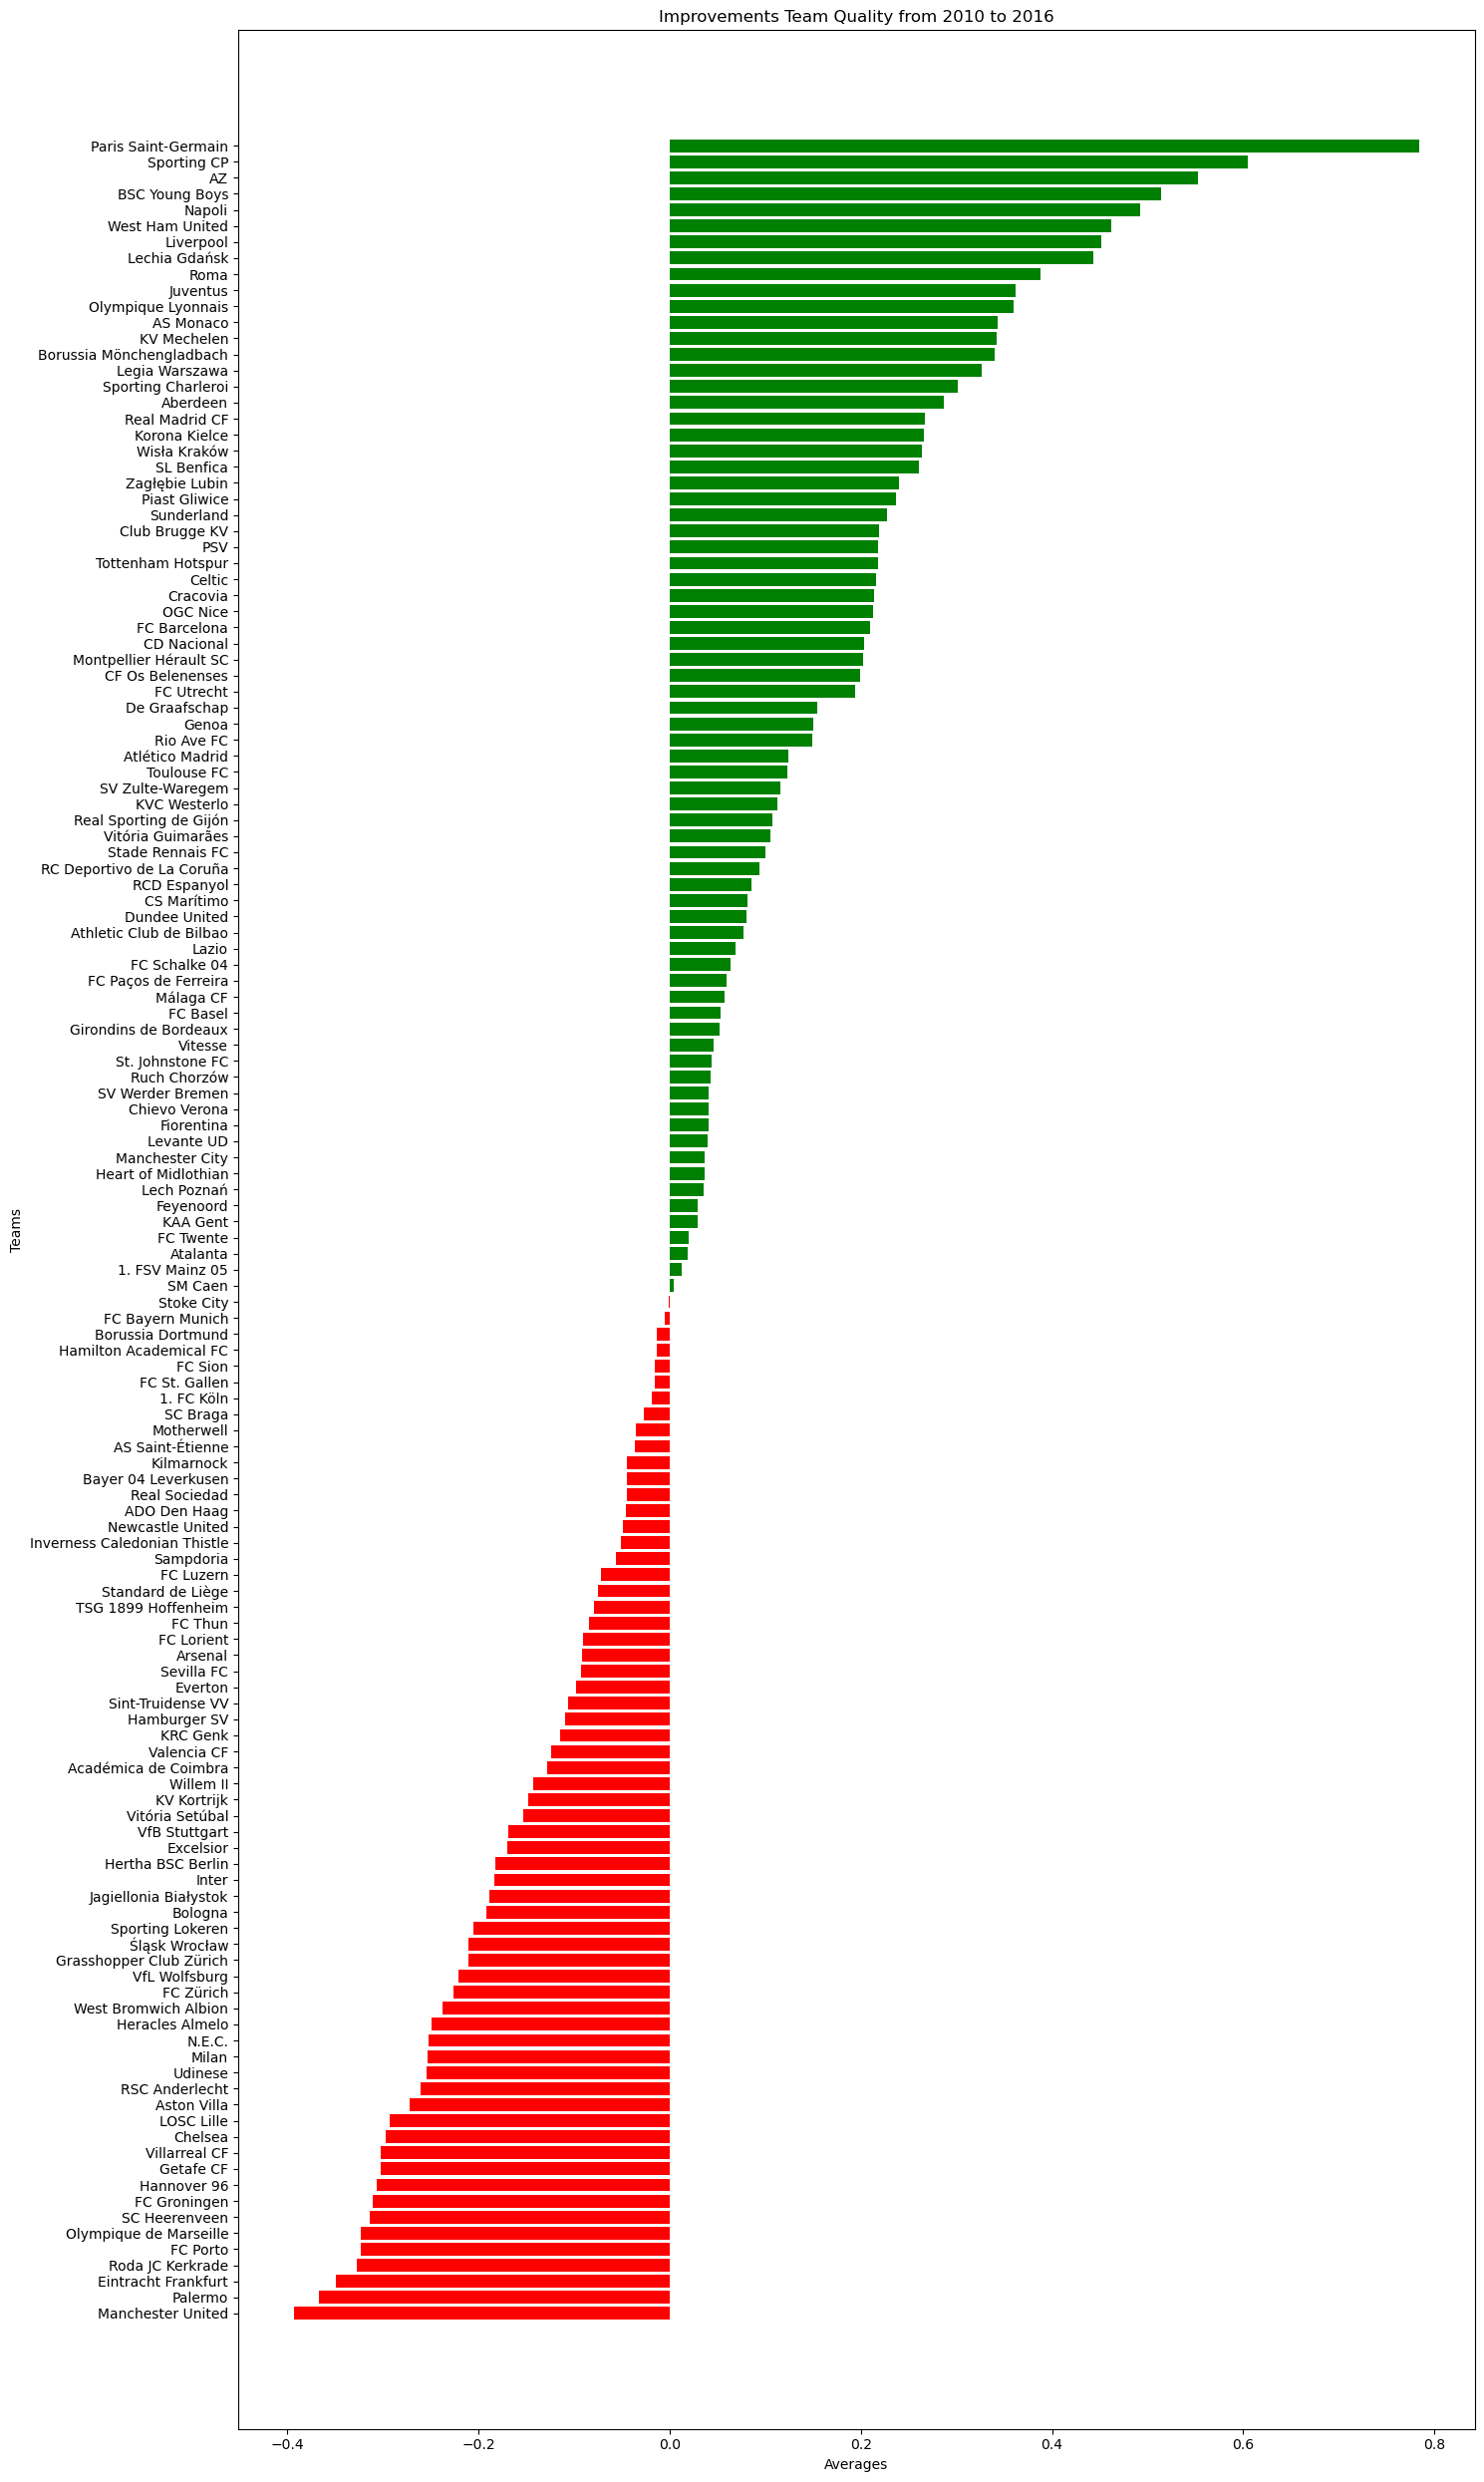

In [216]:
diff_match_2016_2010.dropna(inplace=True)
print('Improved teams :' + str(diff_match_2016_2010[diff_match_2016_2010.sort_values() > 0].count()))

# sort the values 
sorted_index = diff_match_2016_2010.sort_values().index

fig, ax = plt.subplots(figsize=(15, 25))

# plot a horizontal bar
plt.barh(range(0,len(sorted_index)), diff_match_2016_2010.sort_values(),color = color)

# Set the position of the y ticks
ax.set_yticks(range(0,len(sorted_index)))

# Set the position of the y ticks labels
ax.set_yticklabels(sorted_index)

# Set the y axis label
ax.set_ylabel('Teams')

# Set the chart's title
ax.set_title('Improvements Team Quality from 2010 to 2016')

# Set the y axis label 
plt.xlabel("Averages")
#show Chart
plt.tight_layout();

### Which players had the most penalties?

The data contains the order of penalty kicks for each player, so we will take the last date, which contains the largest glands of penalty kicks.

In [217]:
# Select top player name and their penalties in descending order
most_penalties = df_player.groupby(['player_name'])['penalties'].max().sort_values(ascending=False)
most_penalties[:10]

player_name
Rickie Lambert     96.0
Andrea Pirlo       95.0
Xavi Hernandez     95.0
Paul Scholes       95.0
Mario Balotelli    95.0
Adrian Mutu        94.0
Cesc Fabregas      94.0
Iker Casillas      94.0
David Trezeguet    94.0
Fernando Torres    93.0
Name: penalties, dtype: float64

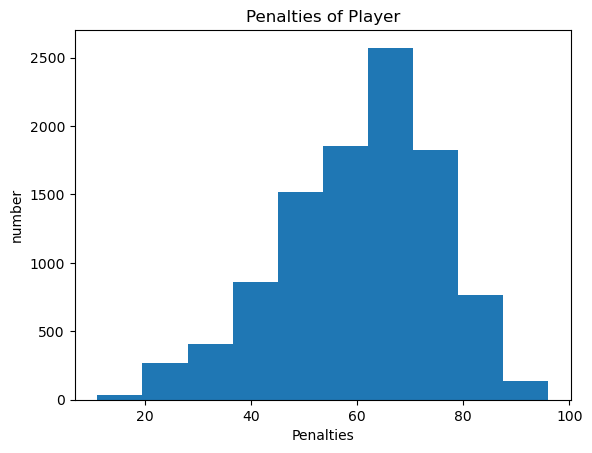

In [218]:
# Figure the result in Histogram 
most_penalties.plot(kind='hist', title='Penalties of Player');
plt.xlabel('Penalties');
plt.ylabel('number');

### What team attributes lead to the most victories?

Now we will discover which attributes lead to the most victories so we analyze data of the top 10 winner team

In [219]:
# Select a top team  that most winner in 2015/2016
top_teams = df_team[(df_team["team_long_name"].isin(wins_16.index)) & (df_team['year'] == 2015)]

In [220]:
# Show teams which have most wins in 2016
wins_16.index 

Index(['Paris Saint-Germain', 'Juventus', 'SL Benfica', 'FC Barcelona',
       'Real Madrid CF', 'Atlético Madrid', 'FC Bayern Munich', 'Sporting CP',
       'Celtic'],
      dtype='object')

I list all columns name store digital values

In [221]:
digital_attributes = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting','defencePressure', 'defenceAggression', 'defenceTeamWidth']


In [222]:
#Sample of top_teams with only digital columns
top_teams[digital_attributes].head()

,team_long_name,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
370,Paris Saint-Germain,49,34,62,61,35,57,53,56
497,FC Bayern Munich,45,28,37,31,22,72,53,59
716,Juventus,50,20,65,50,80,35,65,35
1052,Sporting CP,57,56,42,50,55,60,60,54
1094,SL Benfica,69,53,65,66,54,60,57,54


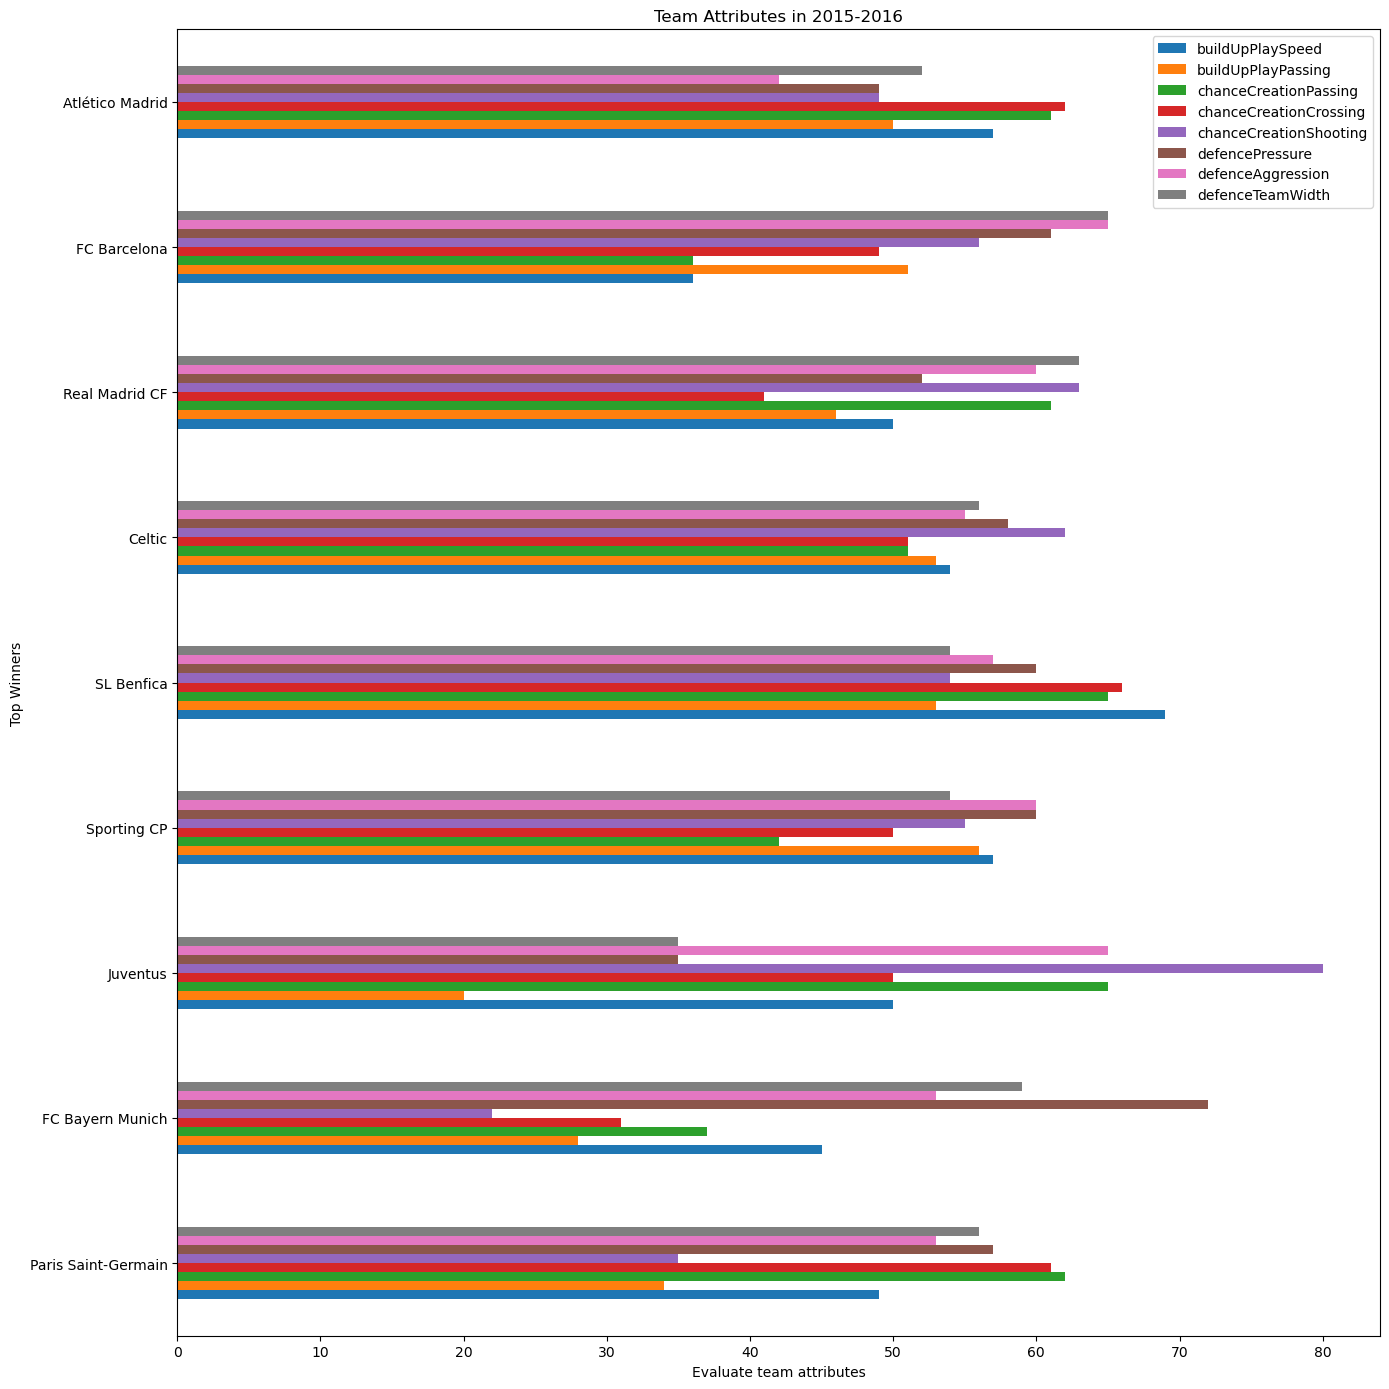

In [224]:
# Figure the result
fig, ax = plt.subplots(figsize=(14, 14))

# create a new bar char
ax = top_teams[digital_attributes].plot.barh(ax=ax);

ax.set_yticklabels(top_teams['team_long_name'])

# Set the y axis label
ax.set_ylabel('Top Winners')

# Set the chart's title
ax.set_title('Team Attributes in 2015-2016')

# Set the y axis label 
plt.xlabel("Evaluate team attributes")

plt.tight_layout();

I list all columns name store descriptive values

In [226]:
descriptive_attributes = ['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']
# assign only columns in descriptive_attributes
attr = top_teams[descriptive_attributes]

Now we will discover descriptive values in pie chart

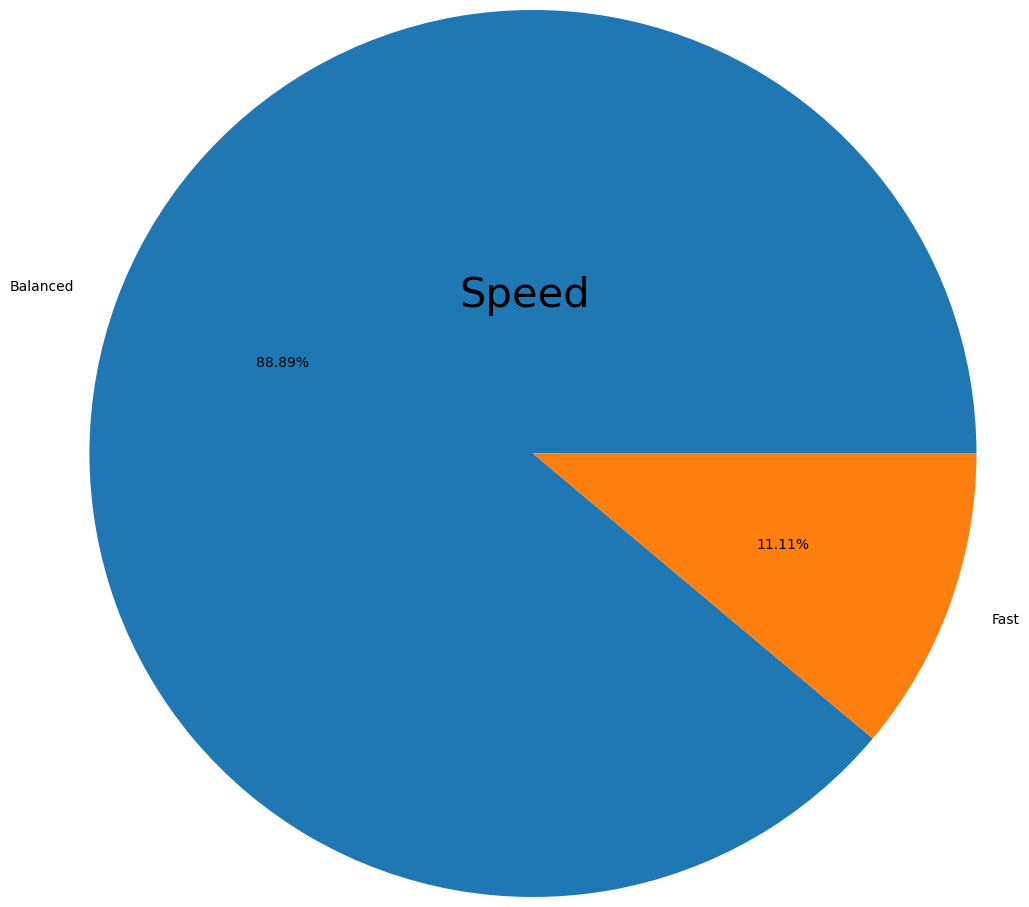

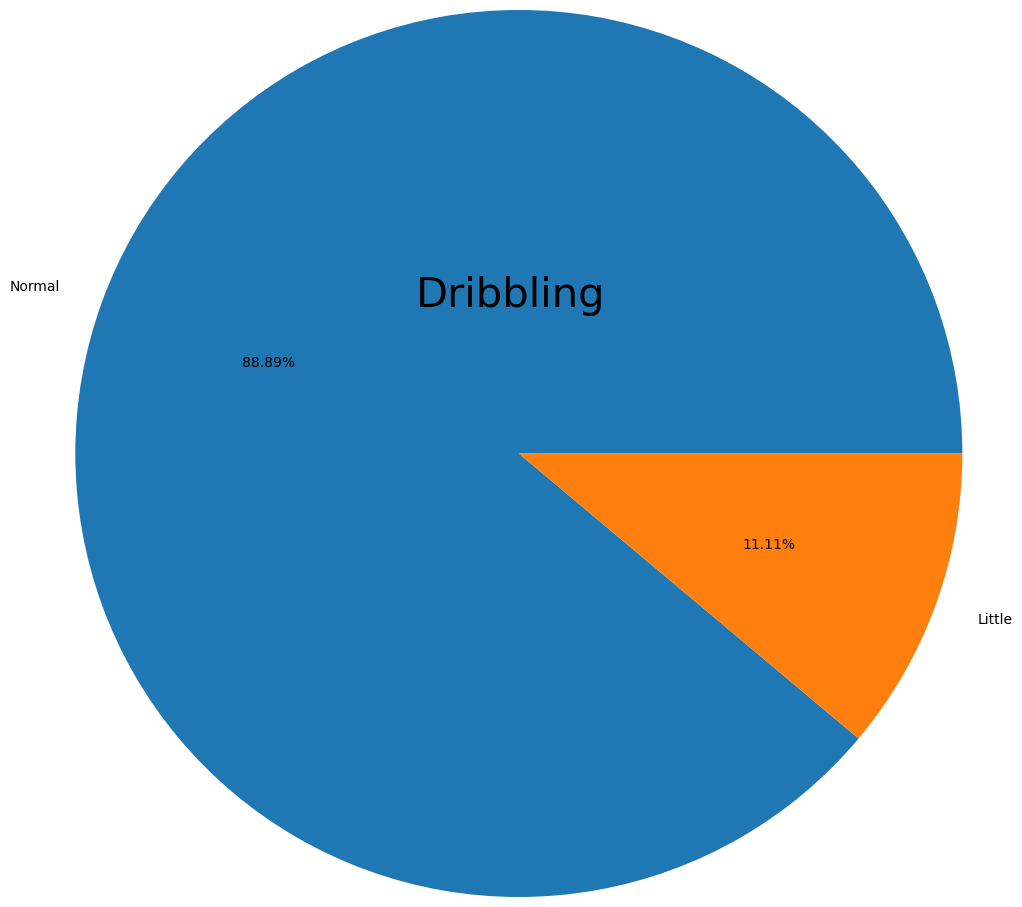

In [227]:
plt.figure(0)
# Create 1st chart here.
plt.pie(attr['buildUpPlaySpeedClass'].value_counts(), labels =  attr['buildUpPlaySpeedClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Speed',fontsize=30,ha='center')

plt.figure(1)
# Create 2nd chart here.
plt.pie(attr['buildUpPlayDribblingClass'].value_counts(), labels =  attr['buildUpPlayDribblingClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Dribbling',fontsize=30,ha='center')

plt.show() #show all figures

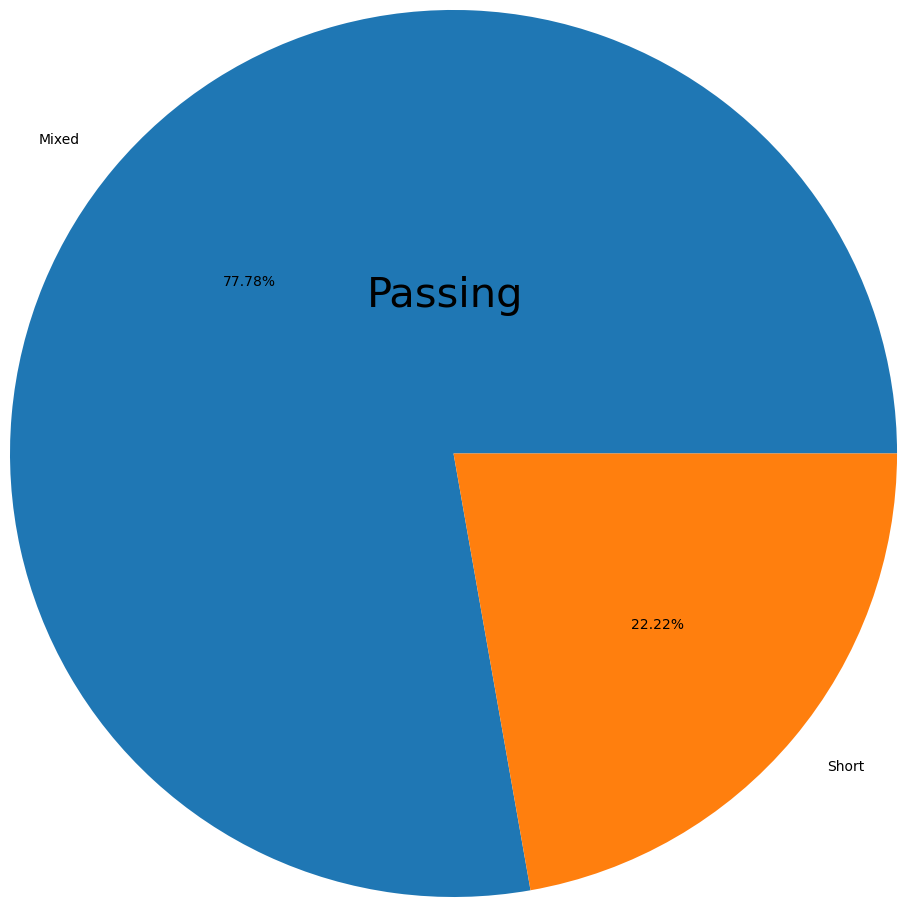

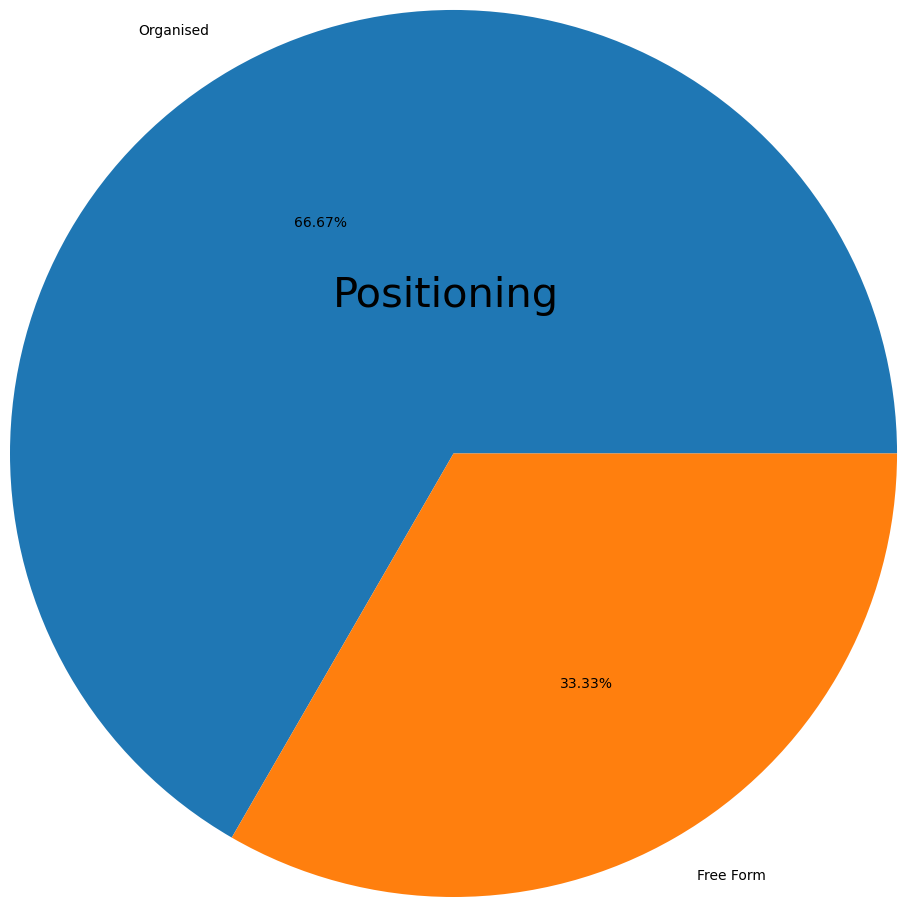

In [228]:
plt.figure(2)
# Create 3ird chart here.
plt.pie(attr['buildUpPlayPassingClass'].value_counts(), labels =  attr['buildUpPlayPassingClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Passing',fontsize=30,ha='center')

plt.figure(3)
# Create 4th chart here.
plt.pie(attr['buildUpPlayPositioningClass'].value_counts(), labels =  attr['buildUpPlayPositioningClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Positioning',fontsize=30,ha='center')


plt.show() #show all figures

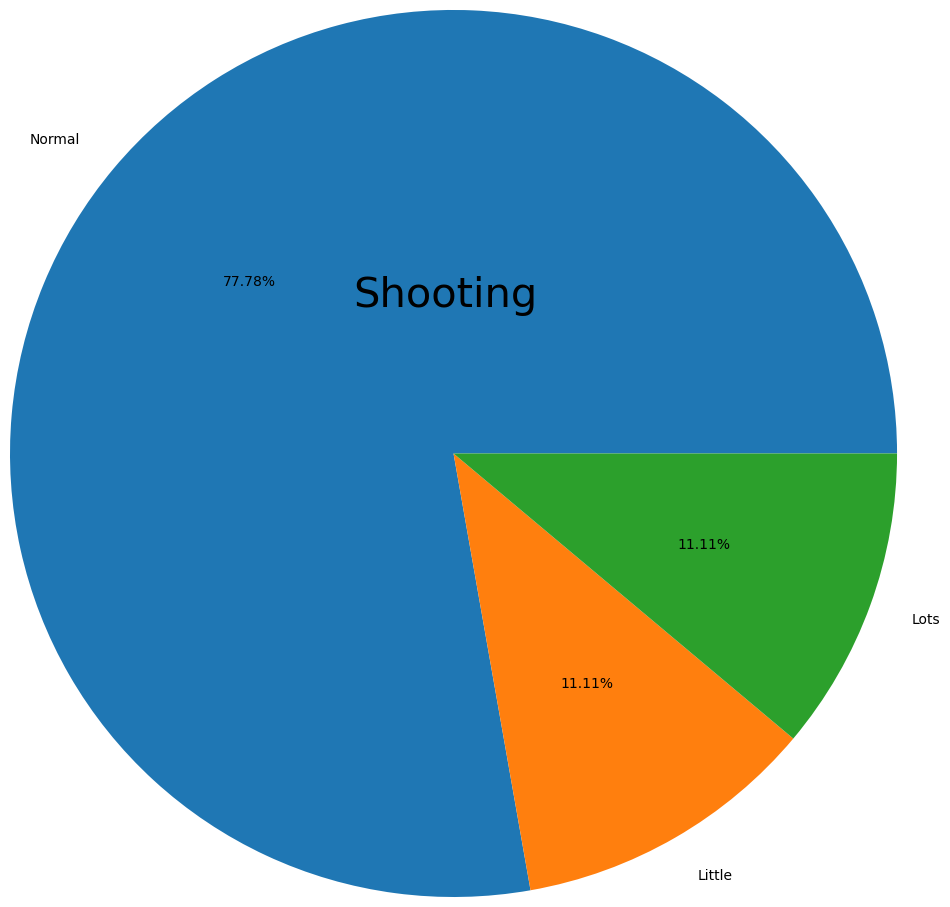

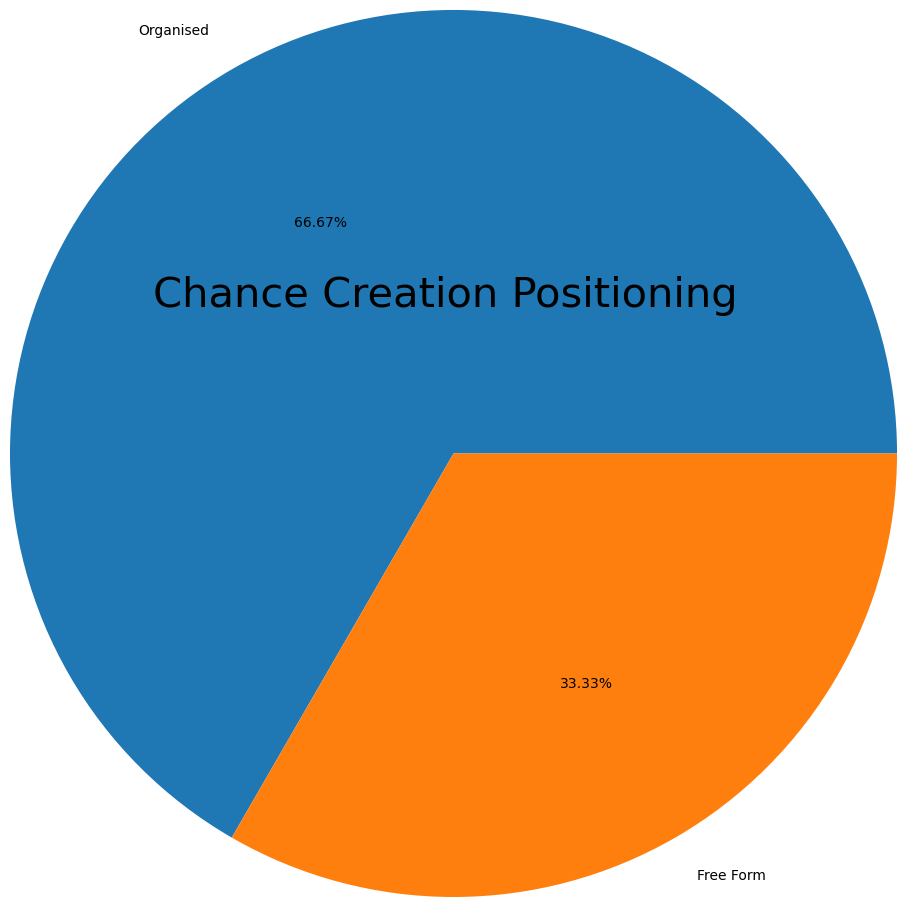

In [229]:
plt.figure(4)
# Create 5th chart here.
plt.pie(attr['chanceCreationShootingClass'].value_counts(), labels =  attr['chanceCreationShootingClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Shooting',fontsize=30,ha='center')

plt.figure(5)
# Create 6th chart here.
plt.pie(attr['chanceCreationPositioningClass'].value_counts(), labels =  attr['chanceCreationPositioningClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Chance Creation Positioning',fontsize=30,ha='center')


plt.show() #show all figures

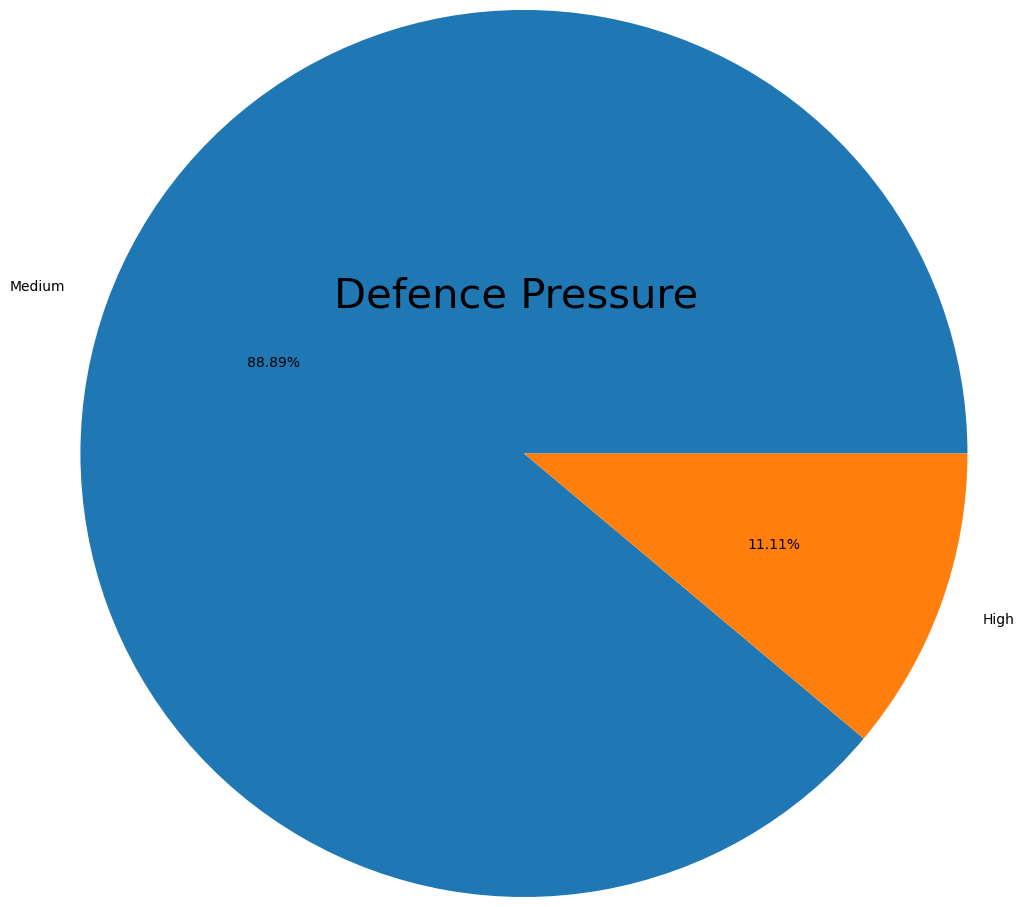

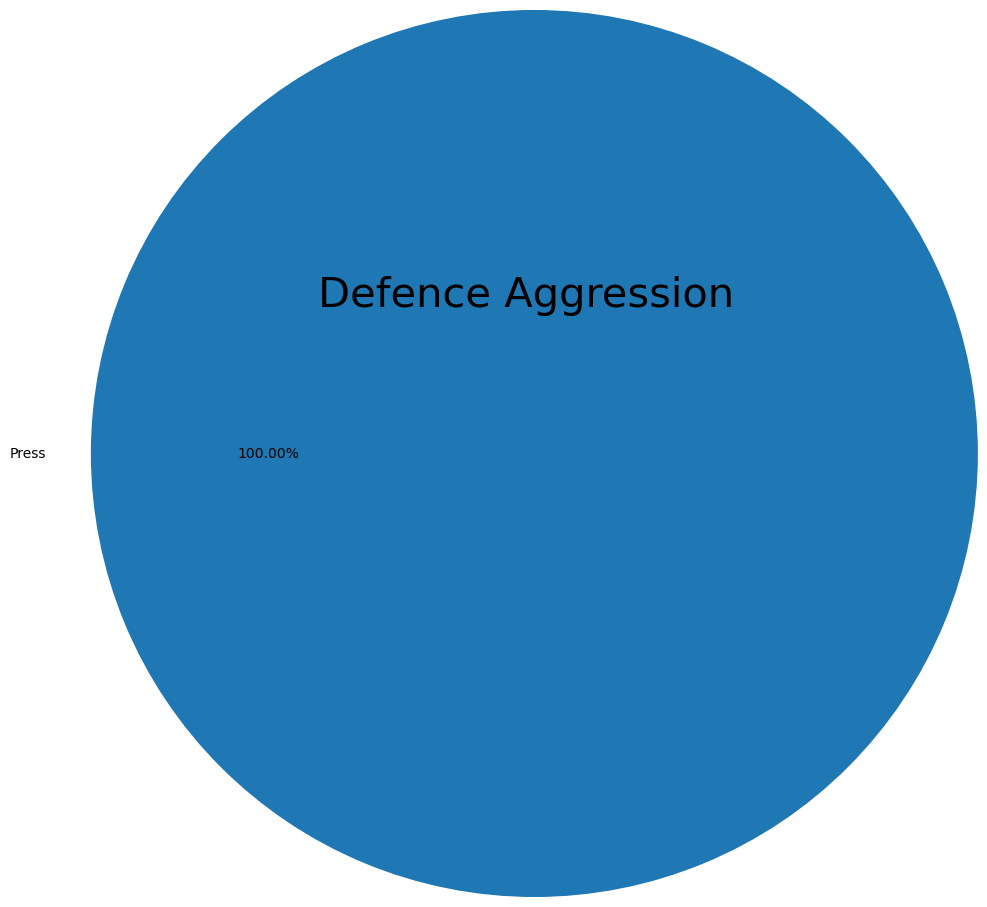

In [230]:
plt.figure(6)
# Create 7th chart here.
plt.pie(attr['defencePressureClass'].value_counts(), labels =  attr['defencePressureClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Pressure',fontsize=30,ha='center')

plt.figure(7)
# Create 8th chart here.
plt.pie(attr['defenceAggressionClass'].value_counts(), labels =  attr['defenceAggressionClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Aggression',fontsize=30,ha='center')


plt.show() #show all figures

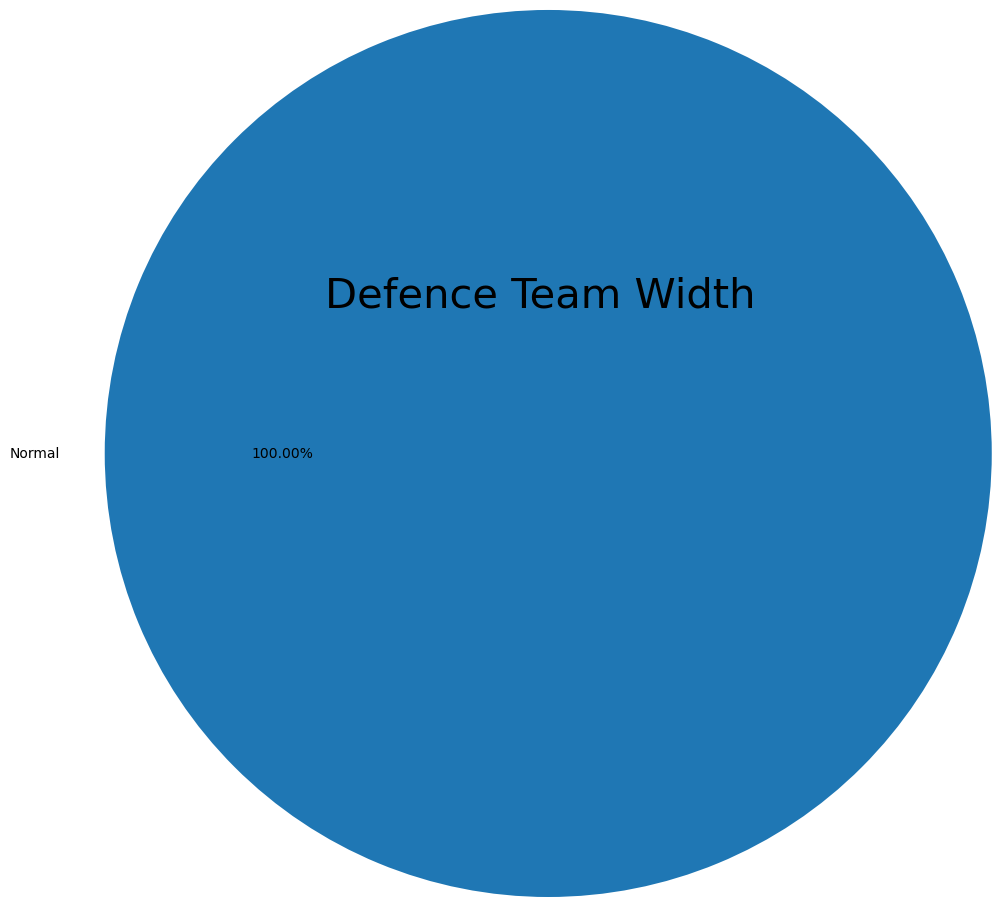

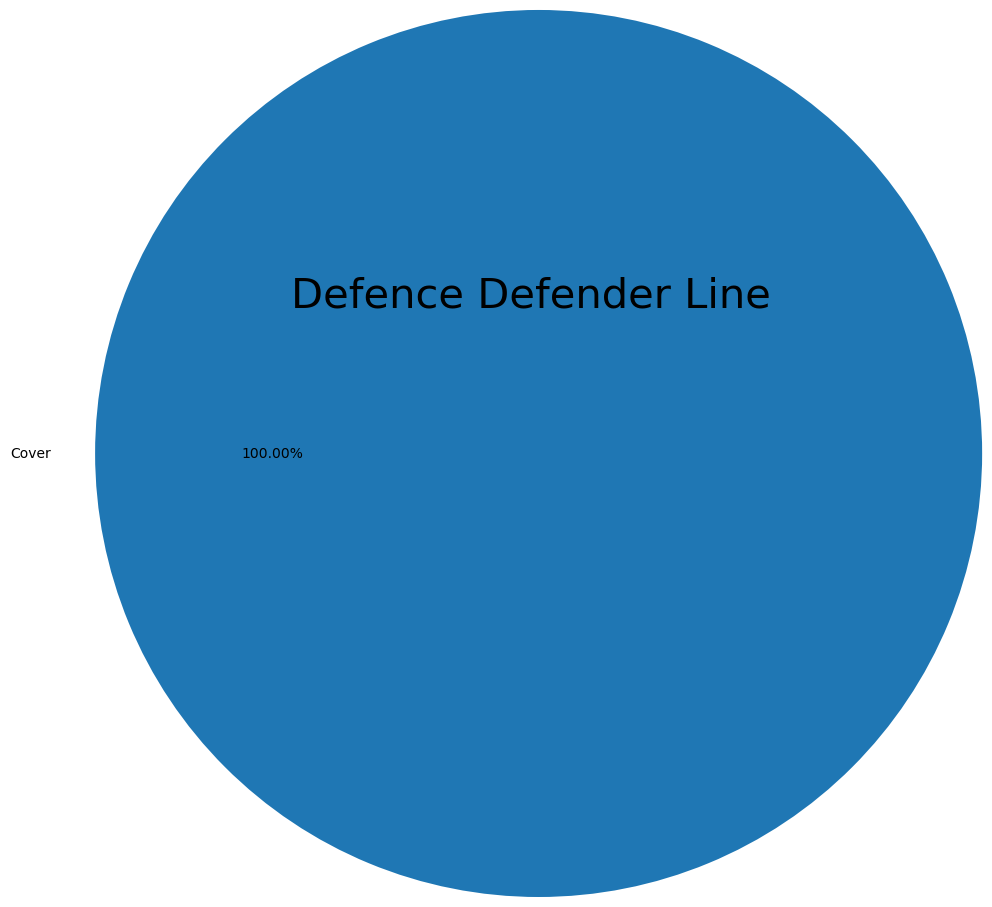

In [231]:
plt.figure(8)
# Create 9th chart here.
plt.pie(attr['defenceTeamWidthClass'].value_counts(), labels =  attr['defenceTeamWidthClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Team Width',fontsize=30,ha='center')

plt.figure(9)
# Create 10th chart here.
plt.pie(attr['defenceDefenderLineClass'].value_counts(), labels =  attr['defenceDefenderLineClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Defender Line',fontsize=30,ha='center')


plt.show() #show all figures

### How many Players have overall rating more than 90 ? 

Now I'll discover How many Players have an overall rating of more than 90 in the dataset who is special players

In [232]:
# Select Maximum Rate
df_player['overall_rating'].max()

94.0

In [233]:
# average of players' overall rating
average_rate = df_player['overall_rating'].mean()
average_rate

68.63280955234481

Select players have above average rating Then Count it

In [234]:
above_rating = df_player[df_player['overall_rating'] > average_rate]
above_rating.player_name.nunique()

6467

In [235]:
pd.DataFrame(above_rating.describe())

,id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,...,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000
mean,5495.301581,181.792446,169.326297,74.063327,77.486483,60.008448,54.887653,61.293437,67.580721,54.744211,...,63.073324,59.687805,49.134669,53.315964,50.452258,14.968255,16.015423,21.099816,16.103487,16.401451
std,3197.477408,6.495631,15.240113,4.062179,4.885856,17.642107,19.567213,16.958848,13.712474,18.820248,...,14.748551,15.682882,23.032996,23.009894,23.244323,17.870179,16.911536,22.761531,17.230575,18.294800
min,2.000000,157.480000,117.000000,69.000000,59.000000,3.000000,1.000000,1.000000,7.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2741.000000,177.800000,159.000000,71.000000,74.000000,52.000000,40.000000,54.000000,64.000000,42.000000,...,56.000000,51.000000,25.000000,30.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,5457.000000,182.880000,170.000000,73.000000,77.000000,65.000000,60.000000,65.000000,71.000000,59.000000,...,66.000000,63.000000,53.000000,60.000000,56.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,8229.000000,185.420000,179.000000,76.000000,81.000000,72.000000,70.000000,73.000000,76.000000,69.000000,...,73.000000,71.000000,71.000000,74.000000,72.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,11075.000000,203.200000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


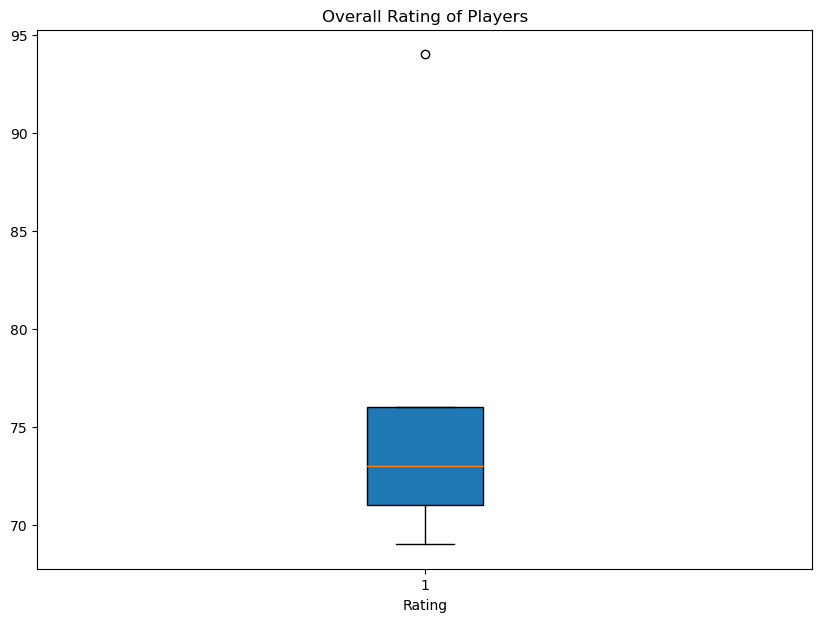

In [236]:
# Filter data
data = above_rating.describe().loc['min':'max',"overall_rating"]
# initialitioze figure
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data,vert=True,patch_artist=True  ) 
#set title and lable
plt.title("Overall Rating of Players")
plt.xlabel('Rating')
# show plot
plt.show()

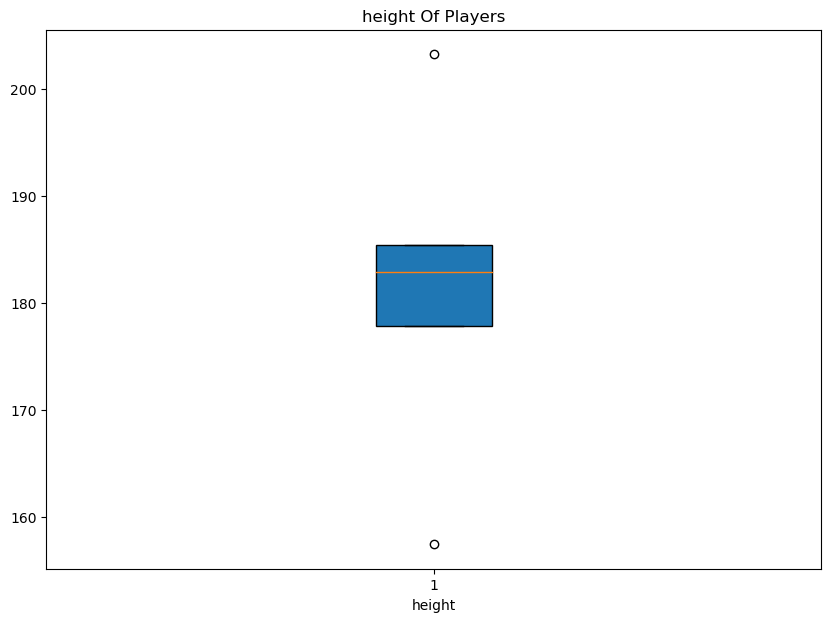

In [237]:
# Filter data
data = pd.DataFrame(above_rating.describe().loc['min':'max',"height"])
# initialitioze figure
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data,vert=True,patch_artist=True ) 
#set title and lable
plt.title("height Of Players")
plt.xlabel('height')
# show plot
plt.show()

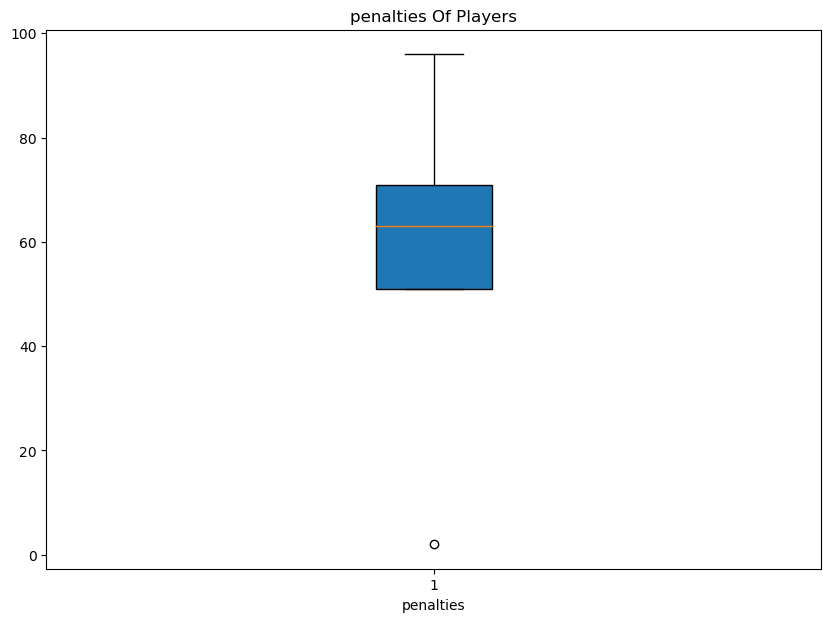

In [238]:
# Filter data
data = above_rating.describe().loc['min':'max',"penalties"]
# initialitioze figure
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(data,vert=True,patch_artist=True ) 
#set title and lable
plt.title("penalties Of Players")
plt.xlabel('penalties')
# show plot
plt.show()

Count players have overall rating more than 90

In [239]:
df_player[(df_player['overall_rating'] > 90)].player_name.nunique()

12

### What are the attributes that contribute to the players' overall rating?

Now we will which attributes affect to Rating of the player which is good and which is Bad effection?

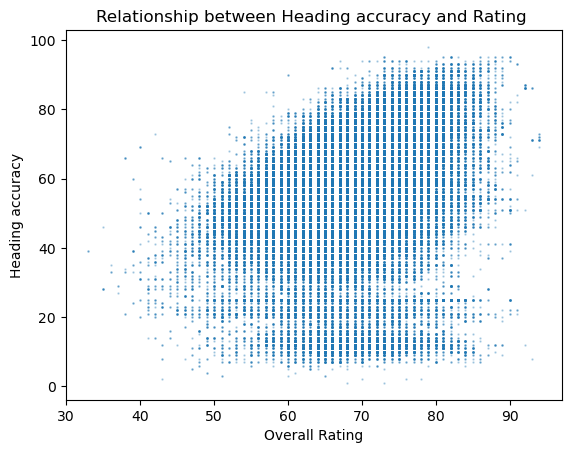

In [240]:
#correlation between heading accuracy and rating 
df_player.plot(x='overall_rating', y='heading_accuracy', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Heading accuracy and Rating ')
plt.xlabel('Overall Rating');
plt.ylabel('Heading accuracy');

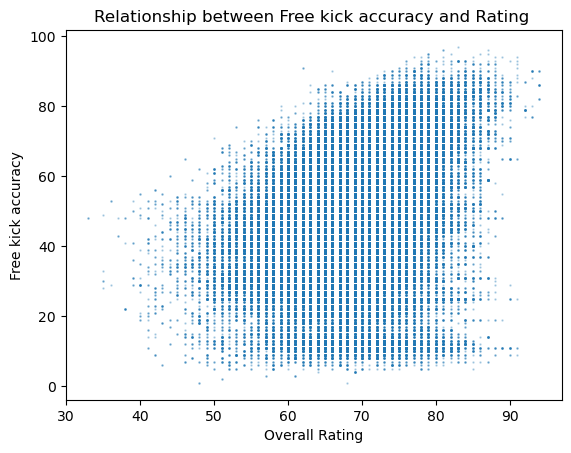

In [241]:
#correlation between rating and free kick accuracy and rating 
df_player.plot(x='overall_rating', y='free_kick_accuracy', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Free kick accuracy and Rating ')
plt.xlabel('Overall Rating')
plt.ylabel('Free kick accuracy');

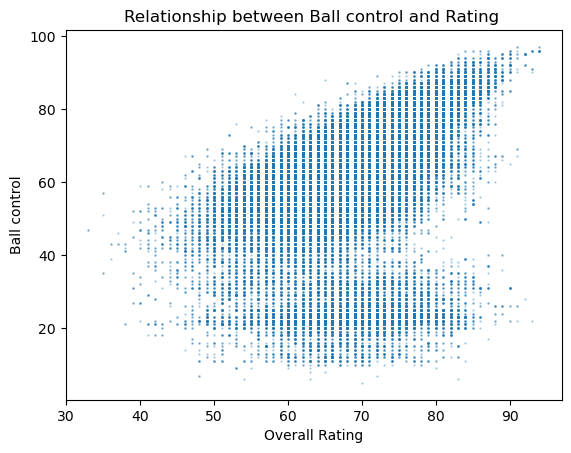

In [242]:
#correlatio correlation between  ball control and rating 
df_player.plot(x='overall_rating', y='ball_control', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Ball control and Rating ')
plt.xlabel('Overall Rating')
plt.ylabel('Ball control');

Text(0, 0.5, 'Long shots')

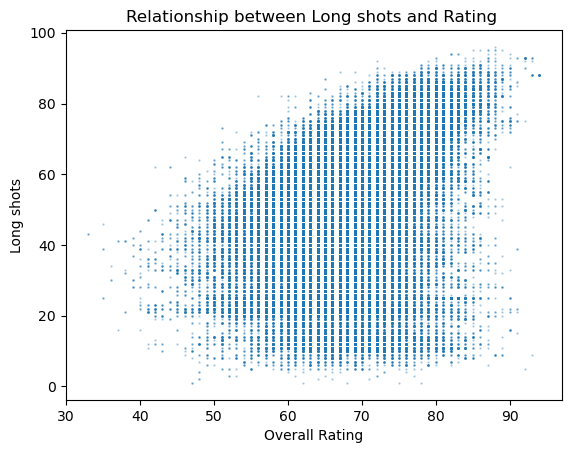

In [243]:
#correlation between long shots and rating 
df_player.plot(x='overall_rating', y='long_shots', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Long shots and Rating ')
plt.xlabel('Overall Rating')
plt.ylabel('Long shots')

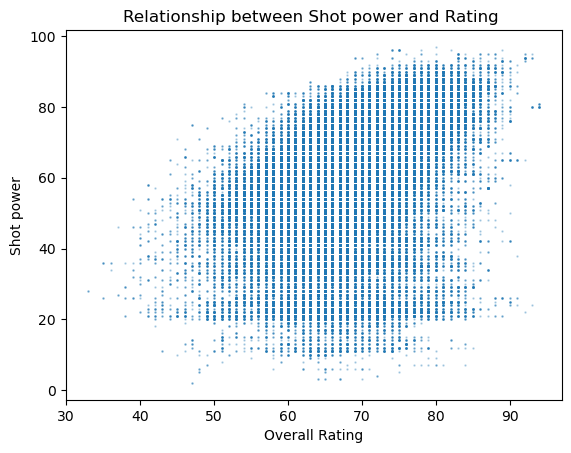

In [244]:
#correlation between shot power and rating 
df_player.plot(x='overall_rating', y='shot_power', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Shot power and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Shot power');

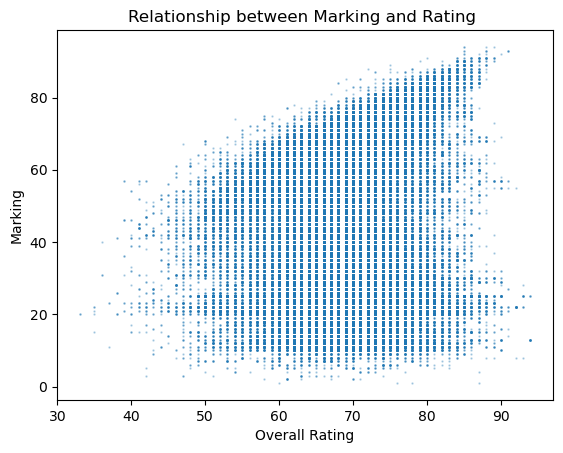

In [245]:
#correlation between marking and rating 
df_player.plot(x='overall_rating', y='marking', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Marking and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Marking');

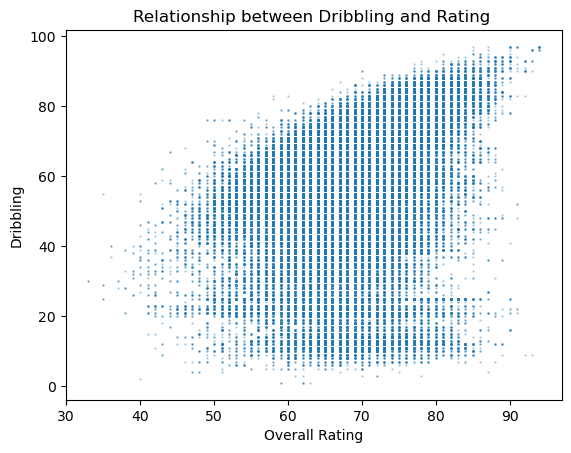

In [246]:
#correlation between dribbling and rating 
df_player.plot(x='overall_rating', y='dribbling', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Dribbling and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Dribbling');

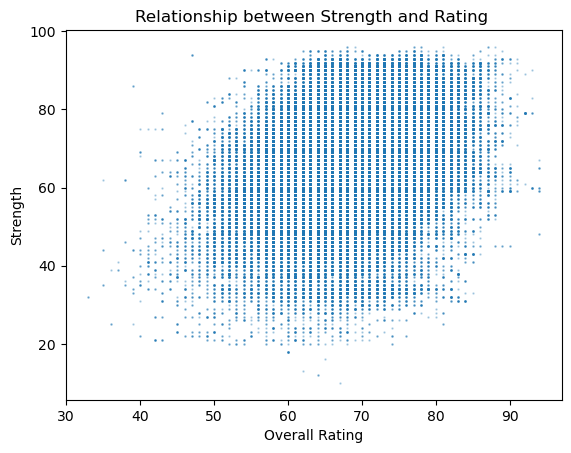

In [247]:
#correlation between strength and rating 
df_player.plot(x='overall_rating', y='strength', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Strength and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Strength');

<a id='limitations'></a>
## Limitations 



>I Noted that some players table are missing from the information of table (missed values). 

> Noted that some Match table are missing from the information of table (missed values)

>The players' name  are duplicated and incomplete so some results aren't accurated and I looking for the full names to disable matching result

>in the Player Attributes table, I found "the buildUpPlayDribbling" column has a huge missed value so If I dropped rows, I'll lose more players so I will remove the column until I fill missed values

>All Date in dataset come as string so I converted it to datetime

>Most of the Challenges in missed values and duplicated records


<a id='conclusions'></a>
## Conclusions



>I found that all leagues have not same number of matches in one season, So each league have diffrent number of teams
England Premier League & France Ligue 1  & Italy Serie A &  Spain LIGA BBVA have the most games: 380 Matches. 

>The most league had Draw games is France Ligue 1 108 games than England Premier League 107 games.

>The most league had Win or lose games is Spain LIGA BBVA	288 games then Italy Serie A 285 games.

>the fewest team had losing matches in the 2016 season is Paris Saint-Germain which only lose 2 game.

>The league that had the most score a Goals in 2015/2016 season is England Premier League 1026 goals then Spain LIGA BBVA 1043 goals.

>The most team had won in 2015/16 is Paris Saint-Germain which win 30 game.

>From  2010 to 2016, the most improved teams by looking at the average  Win times and goals are 'Paris Saint-Germain', 'Sporting CP', 'AZ', 'BSC Young Boys' and 'Napoli'.

>Rickie Lambert, Mario Balotelli, Xavi Hernandez, and Andrea Pirlo are the most penalty scorer in total.

>Most team attributes that lead the teams to win depend on the Change Creation Passing, defense pressure, Defense Aggression, build-up speed, and build dribbling column. Knowing that these results are according to the analysis of the top 10 winning teams

>The count of Players who have an overall rating of more than 90 is 12 players

>Most Top Player attributes depend on a balanced play speed, shot power, dribbling, strength.
